In [14]:
from transformers import GPT2LMHeadModel, pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
model = GPT2LMHeadModel.from_pretrained("gpt2")
print("Number of params:", sum(p.numel() for p in model.parameters()))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Number of params: 124439808


In [5]:
sd_hf = model.state_dict()
for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

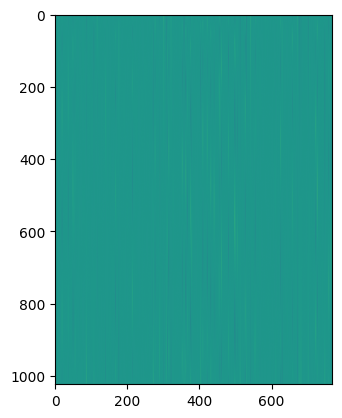

In [6]:
plt.imshow(sd_hf["transformer.wpe.weight"])

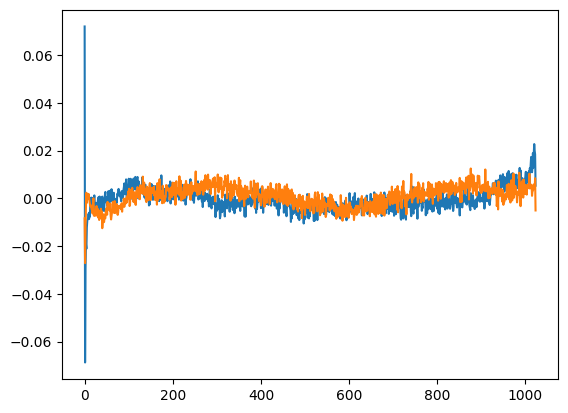

In [13]:

plt.plot(sd_hf["transformer.wpe.weight"][:, 350])
plt.plot(sd_hf["transformer.wpe.weight"][:, 650])

In [8]:
sd_hf["transformer.wpe.weight"].shape

torch.Size([1024, 768])

In [16]:
pipe = pipeline("text-generation", "gpt2")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [18]:
pipe("Hello, i'm language model")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello, i\'m language modeler, and this is just my opinion and I\'m not trying to be a "just" or "skeptic" writer. I\'m just saying, if you need a more thorough guide, check out this.\n\nThis is what I think about the way people write.\n\nDon\'t be a writer, have a lot of fun.\n\nIf you\'re writing for a hobby or just want to be a writer, then probably this is the guide to your specific needs.\n\nI\'ve done this before and it\'s not my style. I just want a list of things I know where I can start, or how to find it.\n\nI\'m also a writer, and I\'ve been doing this for a long time.\n\nIf you\'re looking for a more detailed guide to a specific topic, check this out.\n\nThis isn\'t a list of what I\'m writing about.\n\nIt\'s just my opinion.\n\nI\'m not trying to be a "just" or "skeptic" writer. I\'m just saying, if you need a more thorough guide, check out this.\n\nThis is what I think about the way people write.\n\n\nDon\'t be a writer, have a lot of'}]